# Race Analysis 

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

In [3]:
fastf1.Cache.enable_cache('./cache')

In [4]:
YEAR = 2024
RACE = 3
SESSION = 'R'

race = fastf1.get_session(YEAR, RACE, SESSION)
race.load()

core           INFO 	Loading data for Australian Grand Prix - Race [v2.3.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track 

In [5]:
laps = race.laps.pick_quicklaps()

### Team Pace Comparison

In [18]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

team_order
# make a color palette associating team names to hex codes
team_colors = dict(
    zip(
        team_order,
        sns.color_palette("tab10", n_colors=len(team_order))
    )
)

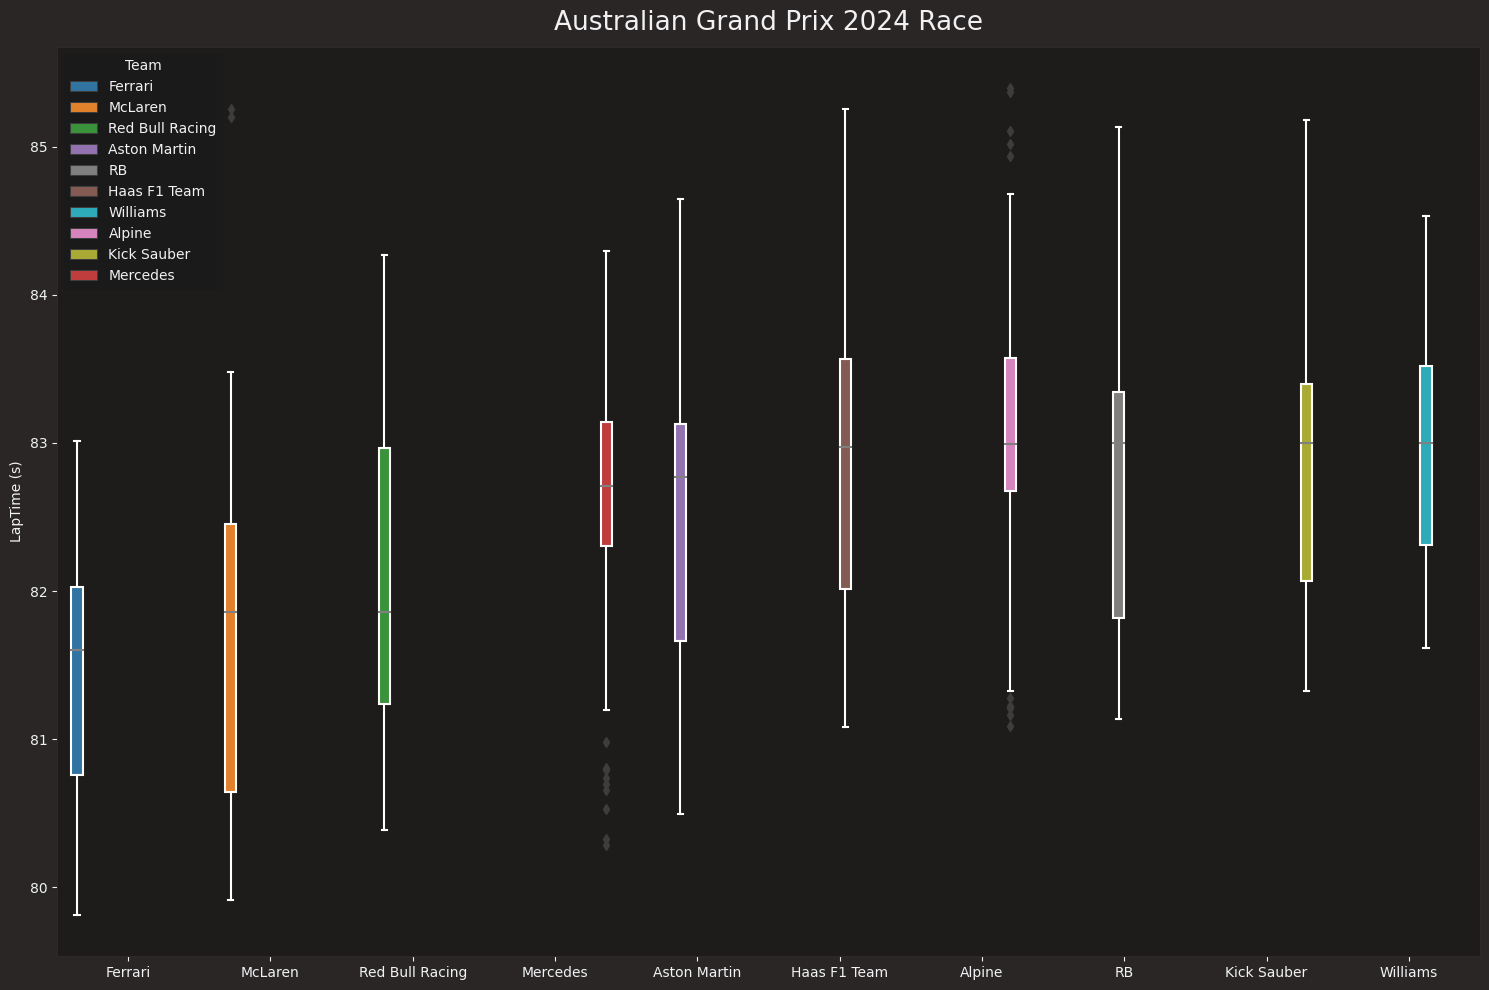

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_colors,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title(f"{race.event['EventName']} {race.event.year} {race.name}")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

### Position changes during a race

core           INFO 	Loading data for Australian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1

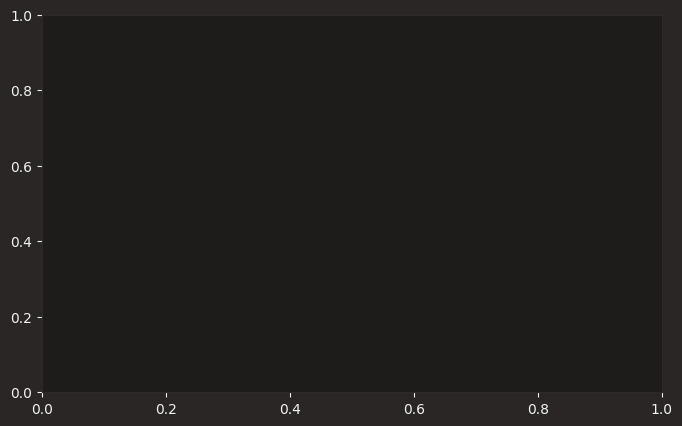

In [25]:
race.load(telemetry=False, weather=False)
fig, ax = plt.subplots(figsize=(8.0, 4.9))


In [30]:
for drv in race.drivers:
    drv_laps = race.laps.pick_driver(drv)
    
    abb = drv_laps['Driver'].iloc[0]
    color = fastf1.plotting.driver_color(abb)
    print(drv_laps[''])
    
    
    # ax.plot(drv_laps['LapNumber'], drv_laps[''])

                     Time DriverNumber                LapTime  LapNumber  \
0  0 days 00:59:57.922000           55                    NaT          1   
1  0 days 01:01:20.522000           55 0 days 00:01:22.600000          2   
2  0 days 01:02:43.528000           55 0 days 00:01:23.006000          3   
3  0 days 01:04:05.961000           55 0 days 00:01:22.433000          4   
4  0 days 01:05:28.590000           55 0 days 00:01:22.629000          5   
5  0 days 01:06:51.162000           55 0 days 00:01:22.572000          6   
6  0 days 01:08:13.596000           55 0 days 00:01:22.434000          7   
7  0 days 01:09:35.899000           55 0 days 00:01:22.303000          8   
8  0 days 01:10:57.924000           55 0 days 00:01:22.025000          9   
9  0 days 01:12:19.639000           55 0 days 00:01:21.715000         10   
10 0 days 01:13:41.577000           55 0 days 00:01:21.938000         11   
11 0 days 01:15:03.752000           55 0 days 00:01:22.175000         12   
12 0 days 01